# Predicting optimum number of clusters 

In [1]:
import pandas as pd
import numpy as np

In [13]:
dataset=pd.read_csv(r"D:\Kshitija\Spark\Datasets\Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing

In [14]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
# Label encoding for Species coloumn
from sklearn.preprocessing import LabelEncoder          
L1 = LabelEncoder()
dataset["Species"]=L1.fit_transform(dataset["Species"])
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [5]:
X=dataset.iloc[:,[1,2,3,4]].values

# Elbow Method

In [5]:
# Solving the problem by K-means Clustering
# By using elbow method finding optimal number of clusters

C:\Users\SHIVNERI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8244]
[680.8244, 152.36870647733906]
[680.8244, 152.36870647733906, 78.94084142614602]
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571]
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.535582051282056]
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.535582051282056, 38.930963049671746]
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.535582051282056, 38.930963049671746, 34.598978434287126]
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.535582051282056, 38.930963049671746, 34.598978434287126, 30.085307692307694]
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.535582051282056, 38.930963049671746, 34.598978434287126, 30.085307692307694, 28.06327473272554]
[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.535582051282056, 38.930963049671746, 34.598978434287126, 30.085307692307694, 28.06327473272554, 26.587316820410813]


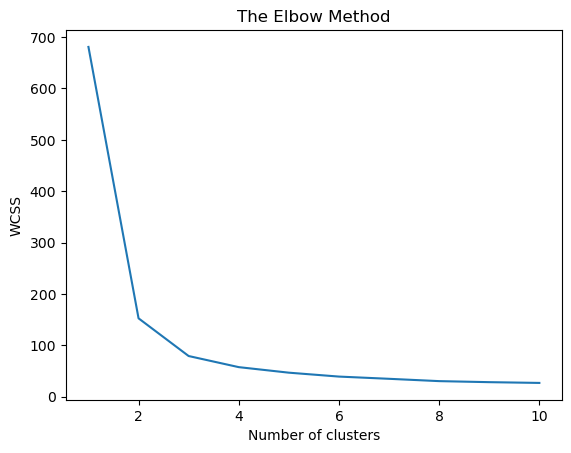

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(wcss)

import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Technique give optimum number of clusters. The point where elbow happens that point is optimum number of clusters.

In above graph elbow happens at 2 and 3 so, number of clusters = 2 or 3

 Here, we take number of clusters = 3

# Working on Model training

In [7]:
# Training the K-Means model on the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [8]:
dataset["Y"]=y_kmeans
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Y
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,2
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,2
148,149,6.2,3.4,5.4,2.3,2,2


# Visualization

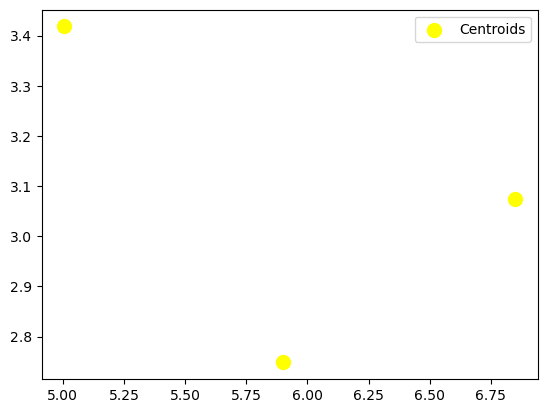

In [12]:
# Plotting the centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

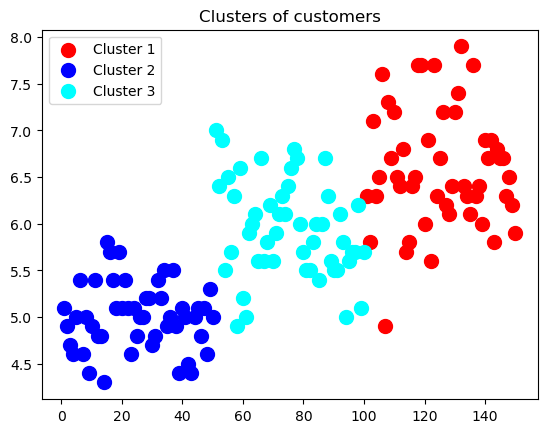

In [20]:
# Visualising the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans == 0,1], s=100, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans == 1,1], s=100, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans == 2,1], s=100, c='cyan',label='Cluster 3')
plt.title('Clusters of Iris')
plt.legend()
plt.show()